In [1]:
# Python Imports

# Custom Library Imports
# from util.load_data_by_os import DataManager

#External Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# datamanager = DataManager()

In [3]:
# Import ORD specific Data
ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")
# ord_df = datamanager.load_ord_by_os()

/tmp/ipykernel_174739/2935119021.py:2: DtypeWarning: Columns (12,14,87,94) have mixed types. Specify dtype option on import or set low_memory=False.
  ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")


In [4]:
# Columns with mixed type warning, lets investigate
ord_df.iloc[:, [12, 14, 87, 94]]

,Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Div2Airport,Div2TailNum
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
599720,NaN,NaN,NaN,NaN
599721,NaN,NaN,NaN,NaN
599722,NaN,NaN,NaN,NaN
599723,NaN,NaN,NaN,NaN


In [5]:
# None of these columns are needed, we can ignore and create our second subfile
include_lst = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate','Marketing_Airline_Network', 'Tail_Number', 'Flight_Number_Operating_Airline',
'Tail_Number', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay',
'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn',
'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
'LateAircraftDelay']

new_ord_df = ord_df[include_lst]

In [6]:
print(len(new_ord_df))
new_ord_df.head()

599725


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Tail_Number,Flight_Number_Operating_Airline,Tail_Number,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2021,4,11,17,3,2021-11-17,UA,N442AW,3727,N442AW,...,110.0,72.0,1.0,536.0,3,NaN,NaN,NaN,NaN,NaN
1,2021,4,11,17,3,2021-11-17,UA,N423AW,3726,N423AW,...,138.0,89.0,1.0,473.0,2,1.0,0.0,11.0,0.0,18.0
2,2021,4,11,17,3,2021-11-17,UA,N438AW,3725,N438AW,...,64.0,29.0,1.0,67.0,1,NaN,NaN,NaN,NaN,NaN
3,2021,4,11,17,3,2021-11-17,UA,N433AW,3723,N433AW,...,163.0,124.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN
4,2021,4,11,17,3,2021-11-17,UA,N433AW,3722,N433AW,...,146.0,120.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN


In [7]:
# new_ord_df.to_csv('../data/ORD_11_21-11-22_short.csv')

In [8]:
ord_df = new_ord_df

def lst_na_cols():
    na_col_lst = []
    no_na_lst = []
    for i in ord_df.columns:
        if ord_df[i].isna().values.any():
            na_col_lst.append(i)
        else:
            no_na_lst.append(i)
    assert len(ord_df.columns) == (len(na_col_lst) + len(no_na_lst))

    print("NA exists in:", na_col_lst)
    print("There are no NAs in :", no_na_lst)

lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup']


In [9]:
# Before dealing with NA we should fill the NAs that should be zero
# These are delay times for sure
ord_df['CarrierDelay'] = ord_df['CarrierDelay'].fillna(0)
ord_df['WeatherDelay'] = ord_df['WeatherDelay'].fillna(0)
ord_df['NASDelay'] = ord_df['NASDelay'].fillna(0)
ord_df['SecurityDelay'] = ord_df['SecurityDelay'].fillna(0)

In [10]:
lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']


In [11]:
pre_ord_df_len = len(ord_df)
ord_df = ord_df.dropna(subset=['ArrDelayMinutes', 'ArrDelay'])
print(f"Dropped {pre_ord_df_len - len(ord_df)} data points")

Dropped 17004 data points


In [12]:
print(len(ord_df))

582721


In [13]:
# Going to drop 1% outliers from delay types
outlier_lst = ['ArrDelay','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']

# test = ord_df

# for i in outlier_lst:
#     temp = ord_df[i].quantile(0.99)
#     ord_df = ord_df[ord_df[i] < temp]
# test.describe()

# for i in outlier_lst:
#     print(len(ord_df))
#     ord_df = ord_df[ord_df[i] < 720]
ord_df = ord_df[ord_df['ArrDelay'] < 720]
# test.describe()
print(len(ord_df))

582045


## Exploring

Let's explore some basic data on important points and make basic figures

In [14]:
ord_df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Operating_Airline,OriginStateFips,DestStateFips,CRSDepTime,DepTime,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,...,582045.000000,582045.000000,582045.0,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,582045.000000,106187.000000
mean,2021.826364,2.545386,6.646756,15.760723,3.971731,2934.910311,23.517931,23.529822,1291.115383,1296.536211,...,134.097840,105.238860,1.0,739.772858,3.408499,4.408929,0.699834,2.326554,0.013691,26.510204
std,0.378797,1.107865,3.409366,8.741464,2.005360,1586.841396,12.851838,12.864513,466.817159,478.592424,...,60.779919,59.513547,0.0,506.796935,1.923023,24.077827,10.309541,13.892303,0.859207,55.395087
min,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,9.000000,1.0,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,4.000000,8.000000,2.000000,1678.000000,17.000000,17.000000,855.000000,857.000000,...,89.000000,60.000000,1.0,342.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,3.000000,7.000000,16.000000,4.000000,3017.000000,17.000000,17.000000,1300.000000,1305.000000,...,124.000000,95.000000,1.0,637.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,4.000000,10.000000,23.000000,6.000000,3936.000000,31.000000,31.000000,1713.000000,1718.000000,...,163.000000,132.000000,1.0,925.000000,4.000000,0.000000,0.000000,0.000000,0.000000,31.000000
max,2022.000000,4.000000,12.000000,31.000000,7.000000,9680.000000,78.000000,78.000000,2359.000000,2400.000000,...,651.000000,545.000000,1.0,4243.000000,11.000000,716.000000,712.000000,706.000000,218.000000,714.000000


In [15]:
print(len(ord_df))

582045


In [16]:
ord_delay_mean = ord_df['ArrDelay'].mean()
ord_delay_median = ord_df['ArrDelay'].median()

print("ORD All flights Delay Mean:", ord_delay_mean)
print("ORD All flights Delay Median:", ord_delay_median)

ORD All flights Delay Mean: 3.005320894432561
ORD All flights Delay Median: -8.0


In [17]:
ord_delays_df = ord_df['ArrDelay'] >= 15
ord_delays_df = ord_df[ord_delays_df]
ord_delay_mean = ord_delays_df['ArrDelay'].mean()
ord_delay_median = ord_delays_df['ArrDelay'].median()

print("ORD Delay Mean:", ord_delay_mean)
print("ORD Delay Median:", ord_delay_median)

ORD Delay Mean: 67.34282915987833
ORD Delay Median: 42.0


In [18]:
flights_num = ord_df['ArrDelay'].count()
delays_num = ord_delays_df['ArrDelay'].count()
print("Amount of Flights:", flights_num)
print("Amount of Delays:", delays_num)
print("Precentage of Delayed Flights:", (delays_num/flights_num))

Amount of Flights: 582045
Amount of Delays: 106187
Precentage of Delayed Flights: 0.1824377840201359


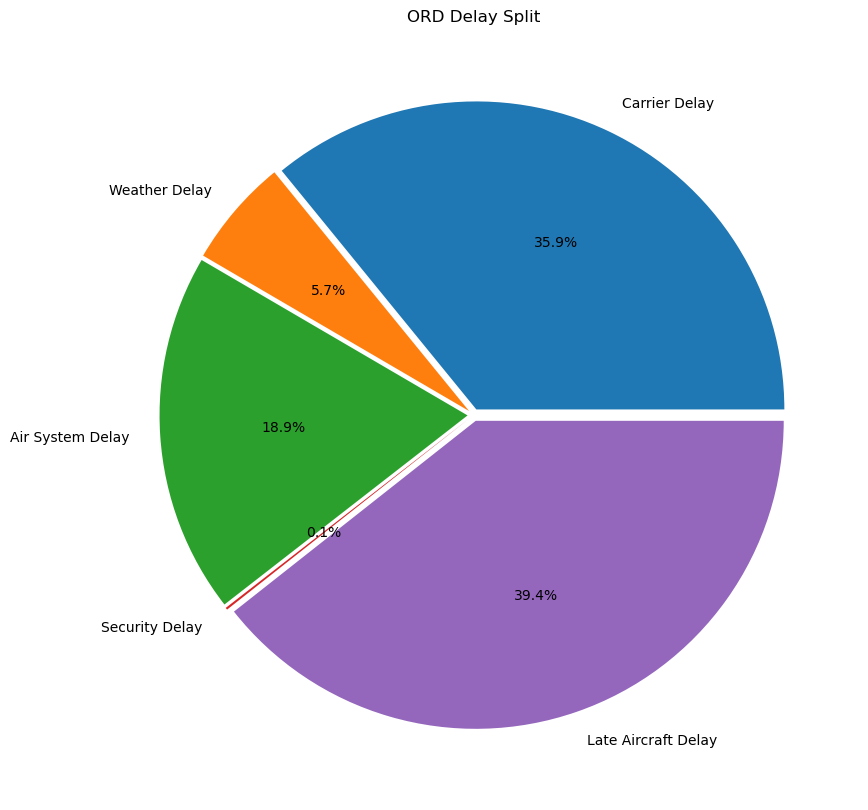

In [19]:
pie_chart_lst = [ord_df['CarrierDelay'].sum(), ord_df['WeatherDelay'].sum(),
 ord_df['NASDelay'].sum(), ord_df['SecurityDelay'].sum(), ord_df['LateAircraftDelay'].sum()]

pie_chart_labels_lst = ["Carrier Delay", 'Weather Delay', 'Air System Delay',
 'Security Delay', 'Late Aircraft Delay']

fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ax1.pie(pie_chart_lst, labels=pie_chart_labels_lst, autopct='%1.1f%%', explode=(.02, .02, .02, .02, .02));
ax1.set_title("ORD Delay Split");

Text(0, 0.5, 'Delay Count')

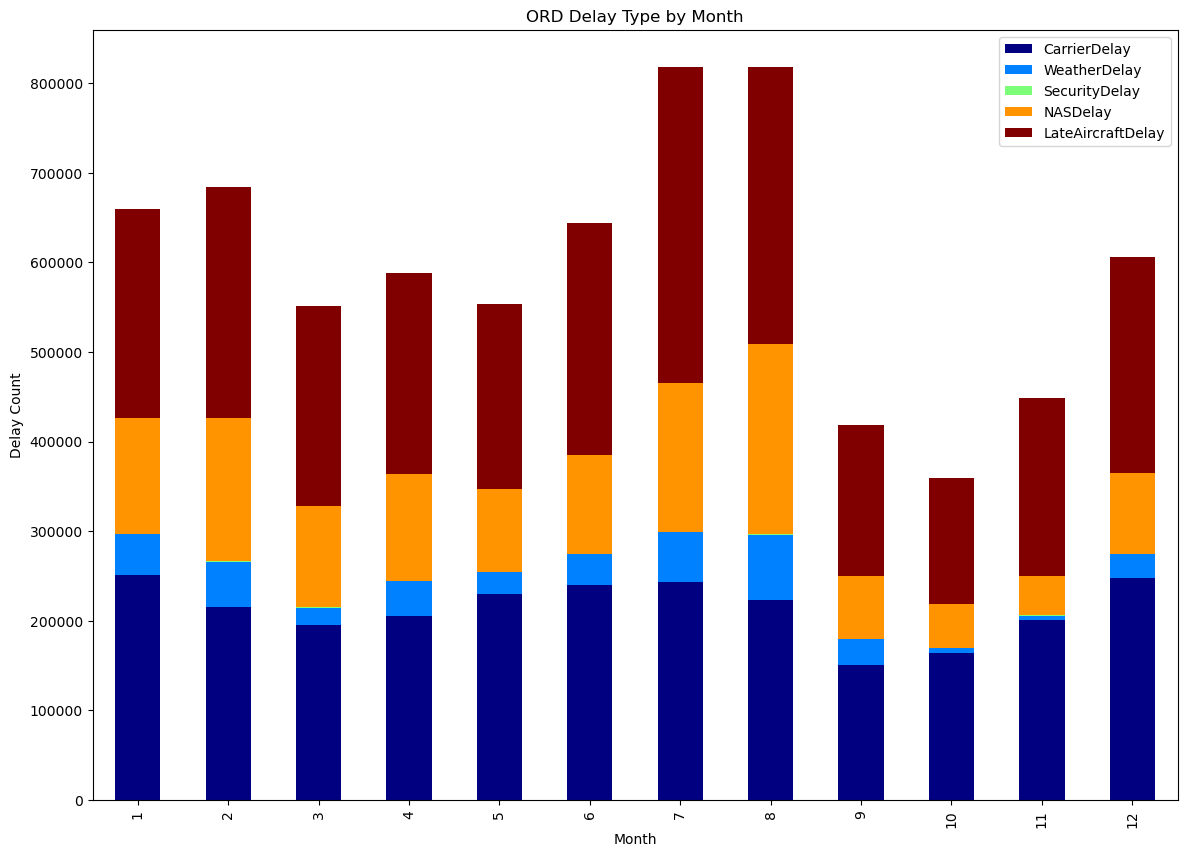

In [20]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

ord_delay_types_df = ord_delays_df[['Month','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']]
delay_cnt_month = ord_delay_types_df.groupby(by='Month').sum()
delay_cnt_month.plot(ax=ax1, kind='bar', stacked=True, cmap='jet')
ax1.set_title("ORD Delay Type by Month");
ax1.set_ylabel("Delay Count")

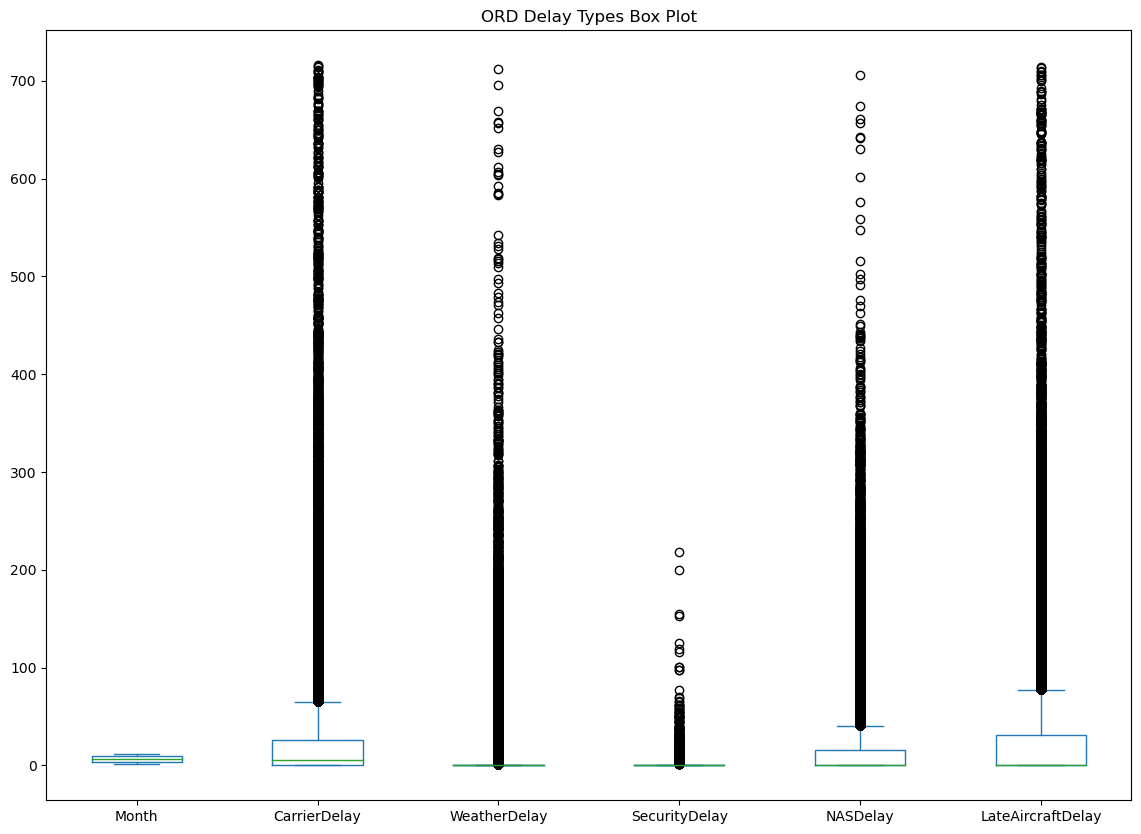

In [21]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ord_delay_types_df.plot.box(ax=ax1)
ax1.set_title("ORD Delay Types Box Plot");

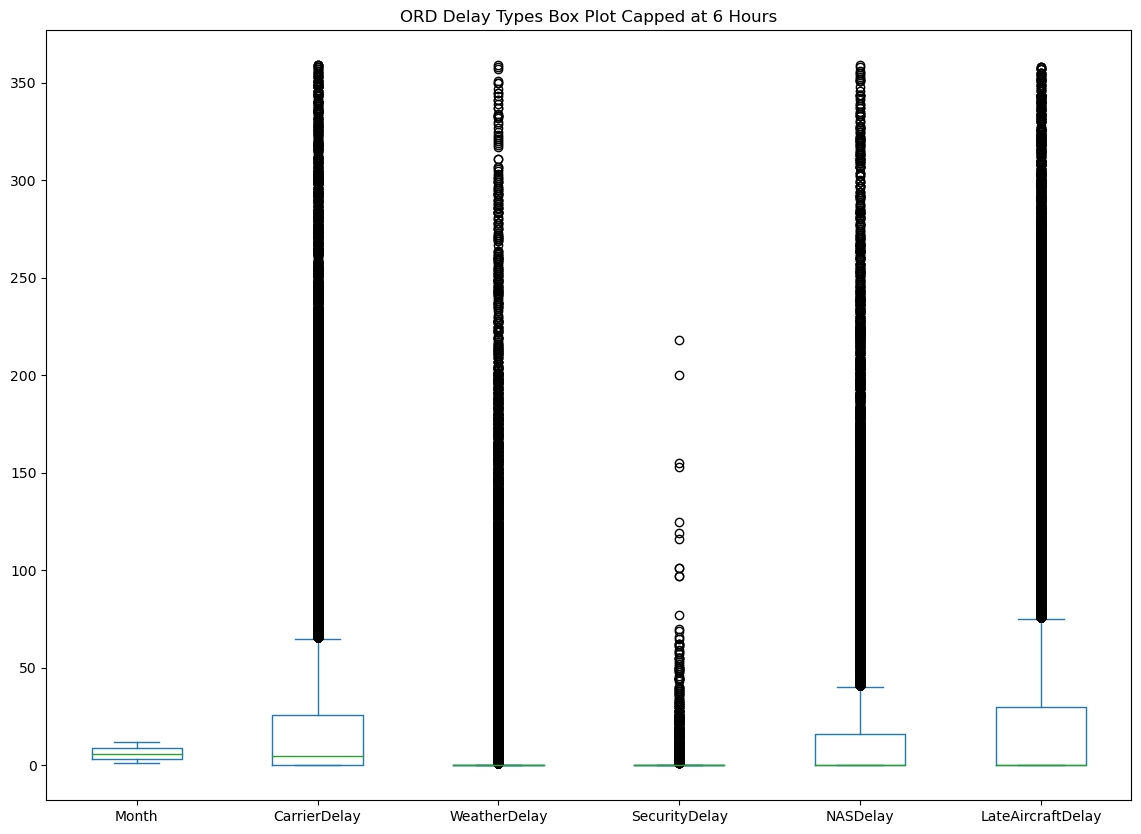

In [22]:
ord_delay_types_df_2 = ord_delays_df[ord_delays_df['ArrDelay'] < 360] 
ord_delay_types_df_2 = ord_delay_types_df_2[['Month','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']]

fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ord_delay_types_df_2.plot.box(ax=ax1)
ax1.set_title("ORD Delay Types Box Plot Capped at 6 Hours");

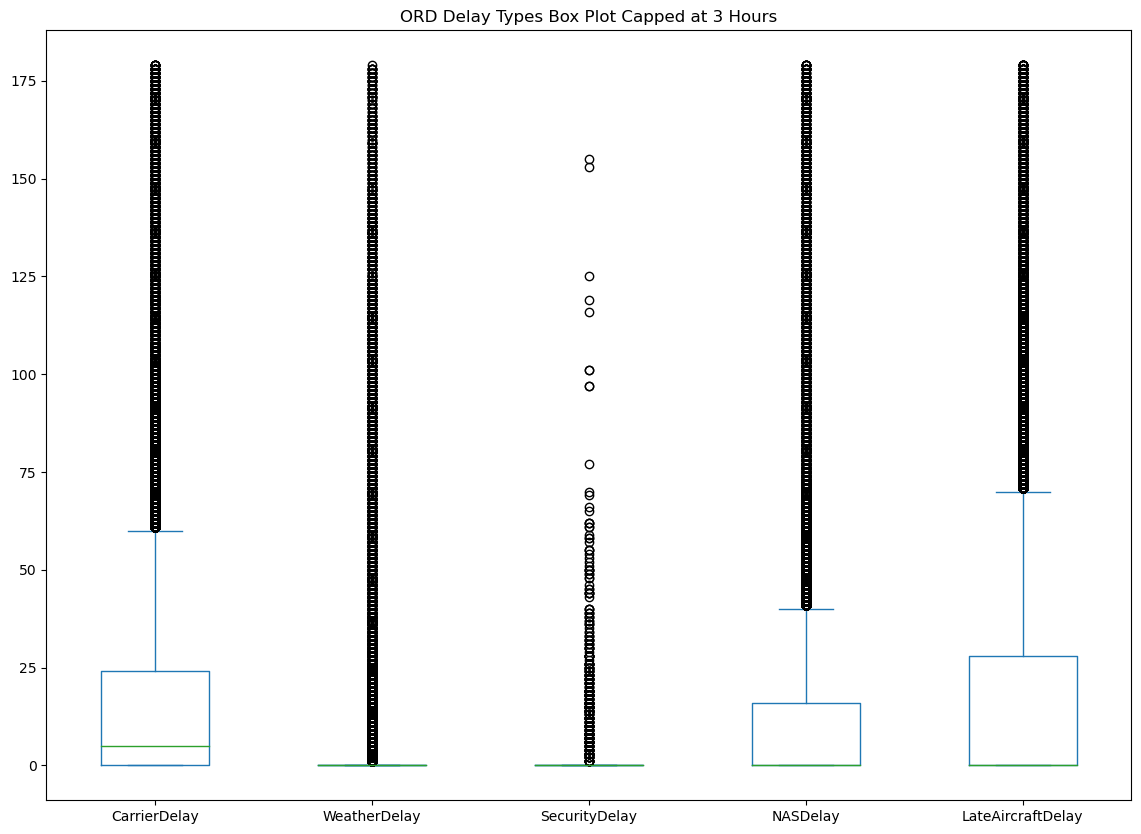

In [23]:
ord_delay_types_df_2 = ord_delays_df[ord_delays_df['ArrDelay'] < 180] 
ord_delay_types_df_2 = ord_delay_types_df_2[['CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']]

fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ord_delay_types_df_2.plot.box(ax=ax1)
ax1.set_title("ORD Delay Types Box Plot Capped at 3 Hours");

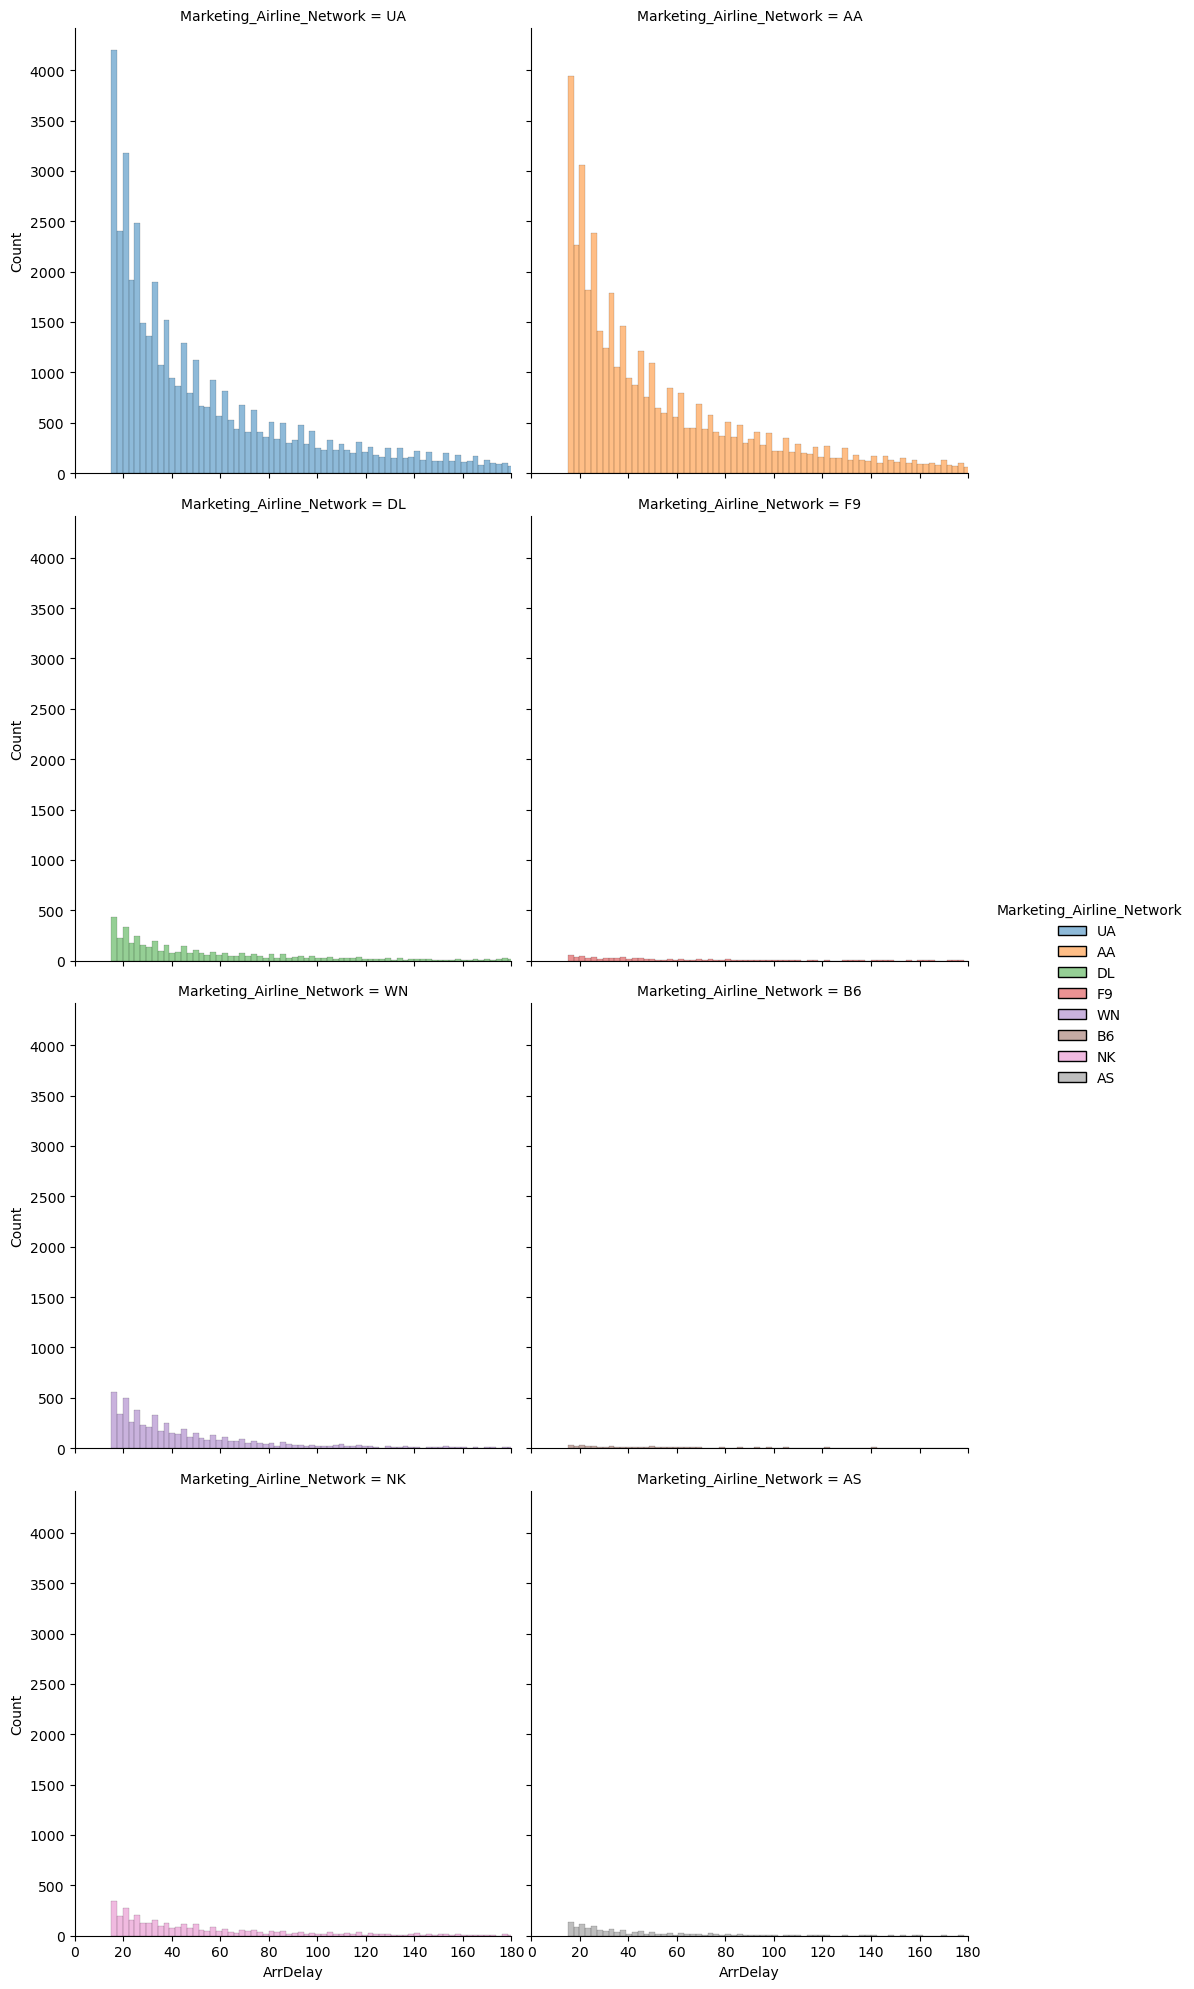

In [24]:
airlines_distribution = sns.displot(data=ord_delays_df, x='ArrDelay', col='Marketing_Airline_Network', col_wrap=2, hue='Marketing_Airline_Network')
airlines_distribution.set(xlim=(0,180))

In [25]:
airline_nums = ord_df.groupby(by='Marketing_Airline_Network').count()
airline_nums.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Tail_Number,Flight_Number_Operating_Airline,Tail_Number,Origin,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Marketing_Airline_Network,,,,,,,,,,,,,,,,,,,,,
AA,221379,221379,221379,221379,221379,221379,221379,221379,221379,221379,...,221379,221379,221379,221379,221379,221379,221379,221379,221379,42991
AS,6304,6304,6304,6304,6304,6304,6304,6304,6304,6304,...,6304,6304,6304,6304,6304,6304,6304,6304,6304,1371
B6,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,...,2218,2218,2218,2218,2218,2218,2218,2218,2218,581
DL,26698,26698,26698,26698,26698,26698,26698,26698,26698,26698,...,26698,26698,26698,26698,26698,26698,26698,26698,26698,4620
F9,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,...,2364,2364,2364,2364,2364,2364,2364,2364,2364,731


Text(0.5, 1.0, 'Flights at ORD by Airline')

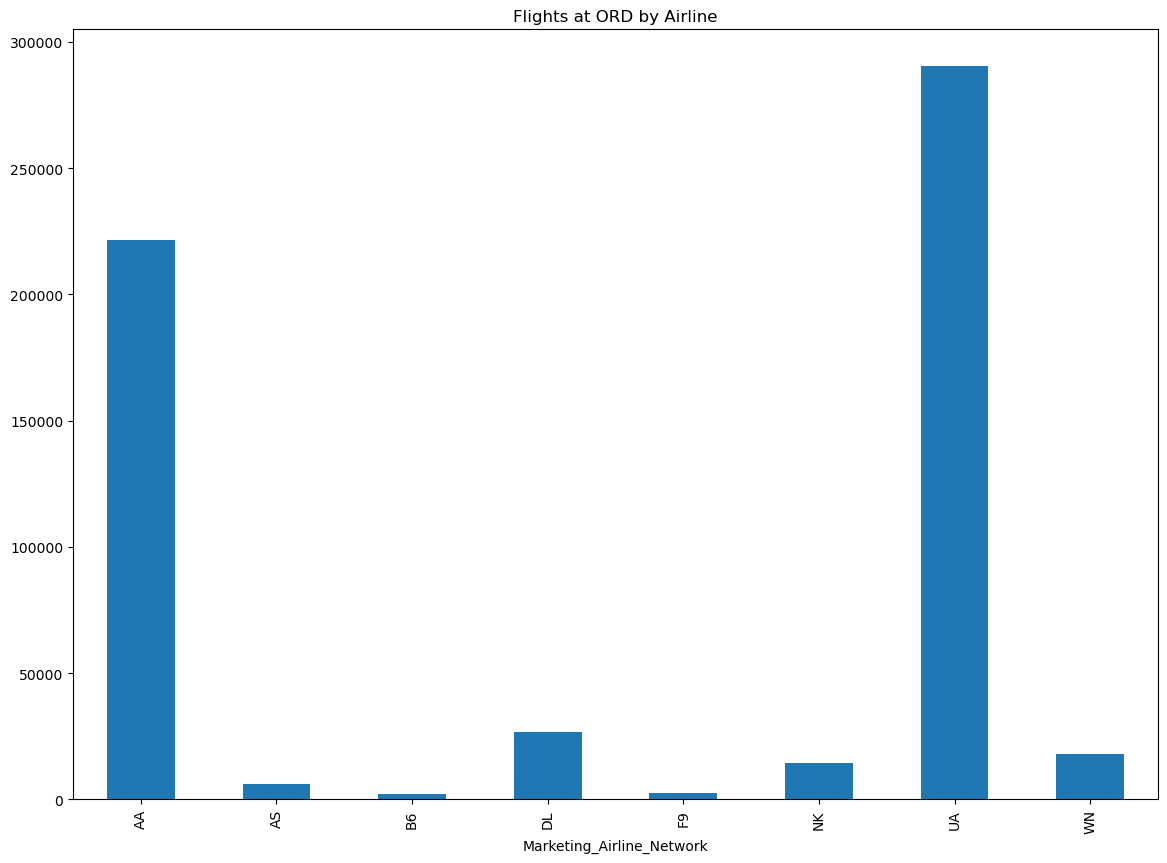

In [26]:
# a little weird of a way to do this but we can see how many entries of year there is per airline
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

airline_nums_flights = airline_nums['Year']
airline_nums_flights.plot.bar(ax=ax1)
ax1.set_title("Flights at ORD by Airline")

In [27]:
# airline_carrier_delay_nums = ord_df.groupby(by='Marketing_Airline_Network').sum(numeric_only=True)

# airline_nums_flights = airline_carrier_delay_nums['CarrierDelay']
# airline_nums_flights.plot.bar(ax=ax1)
# ax1.set_title("Carrier Delay Minutes by Airline")

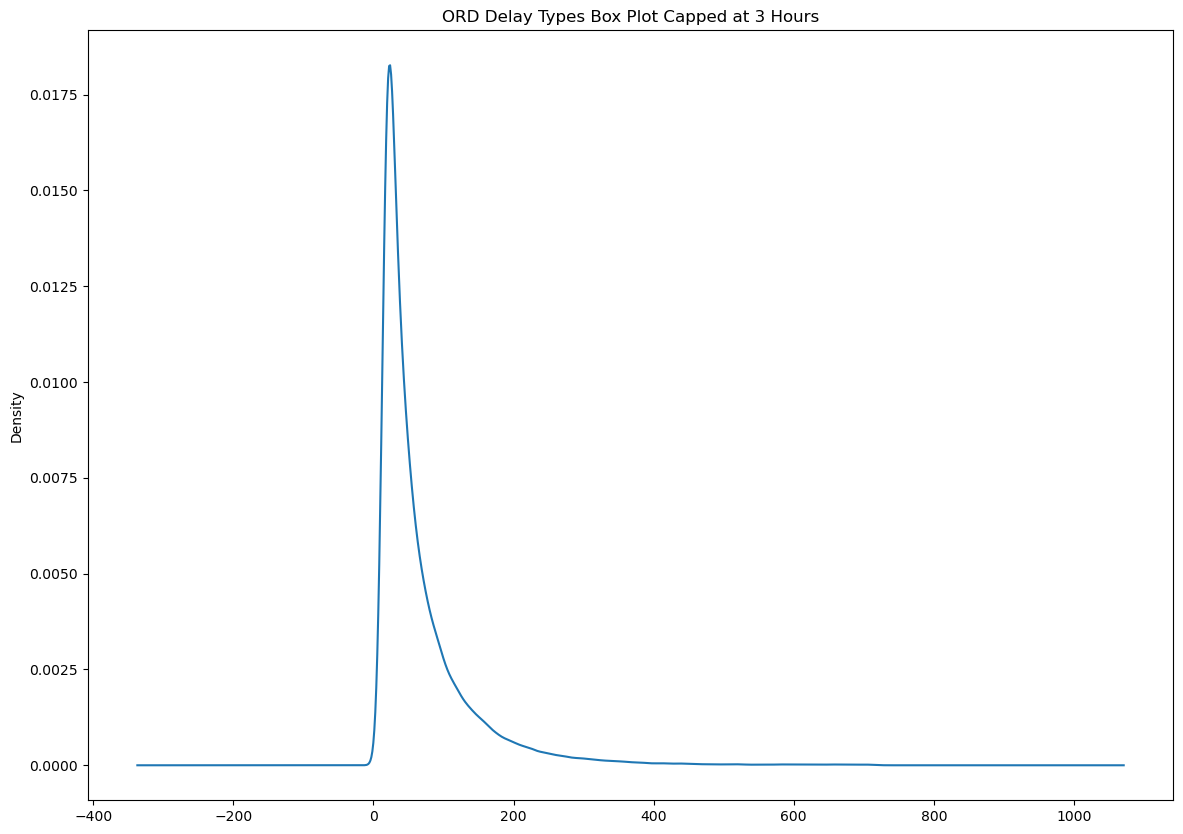

In [28]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ord_delays_df['ArrDelay'].plot(ax=ax1, kind='kde')
ax1.set_title("ORD Delay Types Box Plot Capped at 3 Hours");

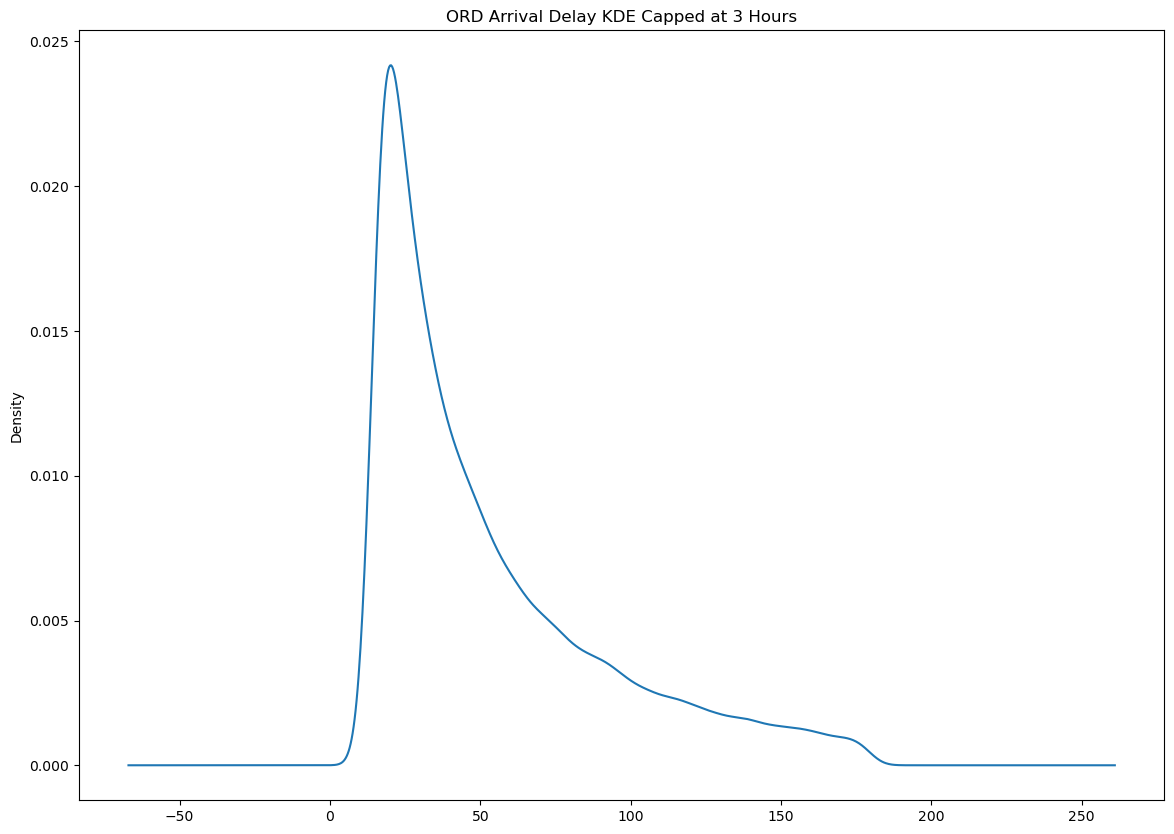

In [29]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ord_delays_180_df = ord_delays_df[ord_delays_df['ArrDelay'] < 180] 
ord_delays_180_df['ArrDelay'].plot(ax=ax1, kind='kde')
ax1.set_title("ORD Arrival Delay KDE Capped at 3 Hours");

In [30]:
# dist_lm = sns.lmplot(data=ord_df, x='Distance', y='ArrDelay', line_kws={'color':'red'})
# dist_lm.set(title='Linear Regression Distance by Arrival Delay')

In [31]:
# dep_time_lm = sns.lmplot(data=ord_df, x='DepTime', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Departure Time by Arrival Delay')

In [32]:
# dep_time_lm = sns.lmplot(data=ord_df, x='TaxiOut', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Taxi Out by Arrival Delay')

In [33]:
# dep_time_lm = sns.lmplot(data=ord_df, x='TaxiIn', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Taxi In by Arrival Delay')

In [34]:
# dep_time_lm = sns.lmplot(data=ord_df, x='DepDelay', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Departure Delay by Arrival Delay')

In [35]:
# dep_time_lm = sns.lmplot(data=ord_df, x='CarrierDelay', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Carrier Delay by Arrival Delay')

In [36]:
# dep_time_lm = sns.lmplot(data=ord_df, x='LateAircraftDelay', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Late Aircraft by Arrival Delay')

In [37]:
# dep_time_lm = sns.lmplot(data=ord_df, x='AirTime', y='ArrDelay', line_kws={'color':'red'})
# dep_time_lm.set(title='Linear Regression Air Time by Arrival Delay')

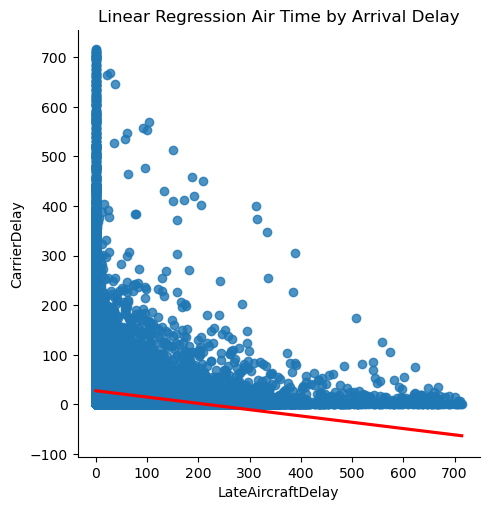

In [40]:
dep_time_lm = sns.lmplot(data=ord_df, x='LateAircraftDelay', y='CarrierDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Air Time by Arrival Delay')